# EDA Notebook
By: Bethany Bailey

In [1]:
# Import libraries and dataframe
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

df = pd.read_csv("gss2012.csv")

In [2]:
# Look at headers to see what types questions were asked in this subset.
headers = df.columns.values
headers

array(['year', 'id', 'wrkstat', 'wrkslf', 'wrkgvt', 'marital', 'sibs',
       'childs', 'age', 'educ', 'degree', 'sex', 'race', 'polviews',
       'partyid', 'mobile16', 'born', 'income06', 'rincom06', 'region',
       'size', 'vote08_coded', 'pres08', 'natspac', 'natenvir', 'natheal',
       'natcity', 'natcrime', 'natdrug', 'nateduc', 'natrace', 'natarms',
       'nataid', 'natfare', 'natroad', 'natsoc', 'natmass', 'natpark',
       'natchld', 'natsci', 'natenrgy', 'eqwlth', 'spkath', 'colath',
       'libath', 'spkrac', 'colrac', 'librac', 'spkcom', 'colcom',
       'libcom', 'spkmil', 'colmil', 'libmil', 'spkhomo', 'colhomo',
       'libhomo', 'spkmslm', 'colmslm', 'libmslm', 'cappun', 'gunlaw',
       'courts', 'grass', 'relig', 'fund', 'attend', 'reliten', 'postlife',
       'pray', 'bible', 'affrmact', 'wrkwayup', 'closeblk', 'closewht',
       'happy', 'confinan', 'conbus', 'conclerg', 'coneduc', 'confed',
       'conlabor', 'conpress', 'conmedic', 'contv', 'conjudge', 'consci'

## Demographic and Party Breakdown

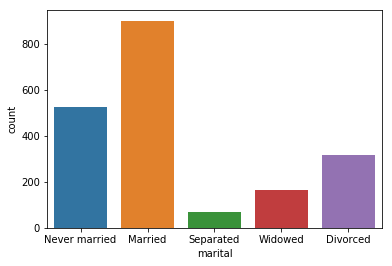

In [3]:
# To get a feel for the data, look at breakdown of participants by demographics.
sns.countplot(x="marital", data=df) # Most people are married or never married.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x106a313c8>]], dtype=object)

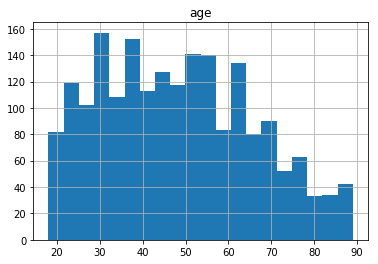

In [4]:
pd.DataFrame.hist(df, column="age", bins=20) # Popultion skews lower.

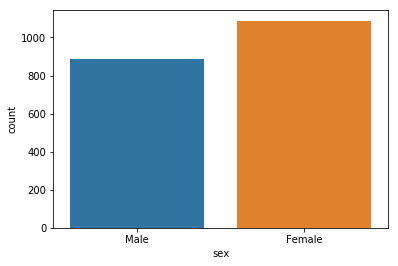

In [5]:
sns.countplot(x="sex", data=df) # More females surveyed than males.

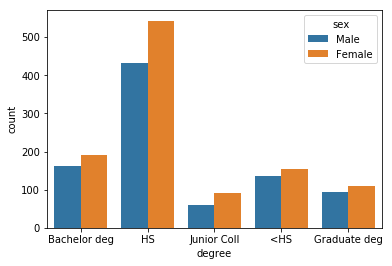

In [105]:
# Breakdown of degree attained by sex.
sns.countplot(x="degree", hue="sex", data=df) 

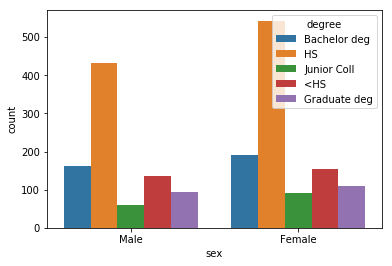

In [104]:
#  TO see this more clearly, breakdown of sex by degree attained.
sns.countplot(x="sex", hue="degree", data=df) 

## Voting rates and government confidence

In [ ]:
# If we wanted to ask political questions, we could look at the breakdown by party.
sns.countplot(x="partyid", data=df, order=("StrDem", "WkDem", "IndDem", "Ind", "IndRep", "WkRep",\
                                                      "StrRep"))
plt.title('Party ID Barchart') # fewer rep interviewed

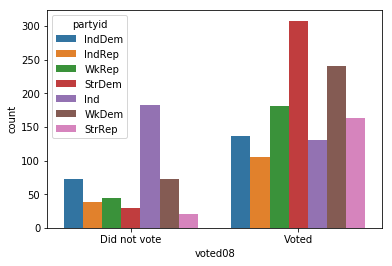

In [24]:
# How does voting in '08 breakdown among political parties?
sns.countplot(x="voted08", hue="partyid", data=df)

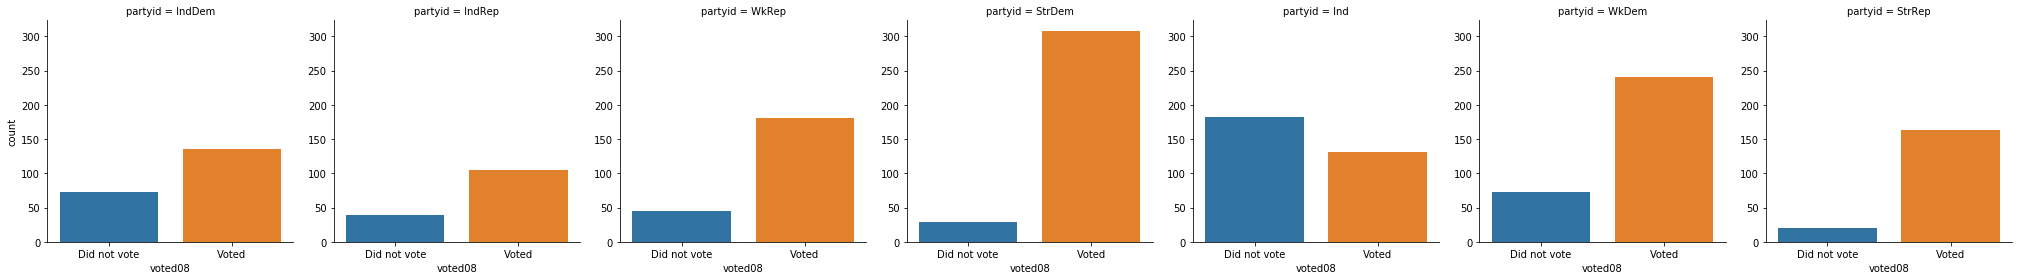

In [146]:
# Might be easier to see with a factorplot.
sns.factorplot(x="voted08", col="partyid", kind="count", data=df) # ind did not vote more than they voted

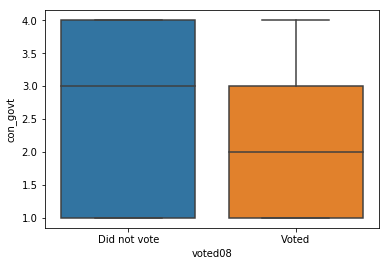

In [28]:
# How does confidence in government vary among people who voted/didn't vote?
sns.boxplot(x="voted08", y="con_govt", data=df) # Interestingly, the confidence is lower for individuals who voted.

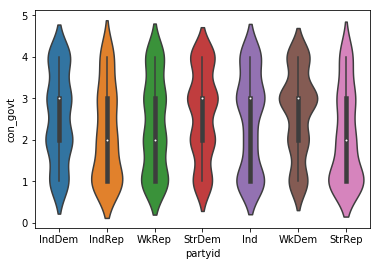

In [32]:
# How does confidence in government vary among political party?
sns.violinplot(x="partyid", y="con_govt", data=df) # Lower for republicans and independents.

## Beliefs about spending

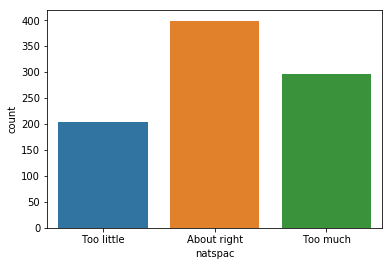

In [7]:
# Maybe look at how people feel about how much we're spending on the nat space program.
sns.countplot(x="natspac", order=("Too little", "About right", "Too much"), data=df)

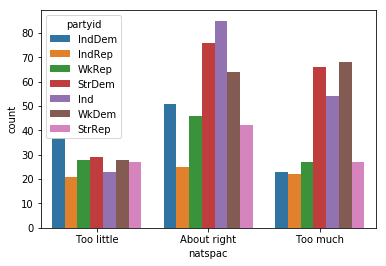

In [149]:
# We can see more people think we are spending about the right amount, and more people think we are spending
# too much, rather than too little. How do those beliefs differ between parties?
sns.countplot(x="natspac", hue="partyid", order=("Too little", "About right", "Too much"), data=df)

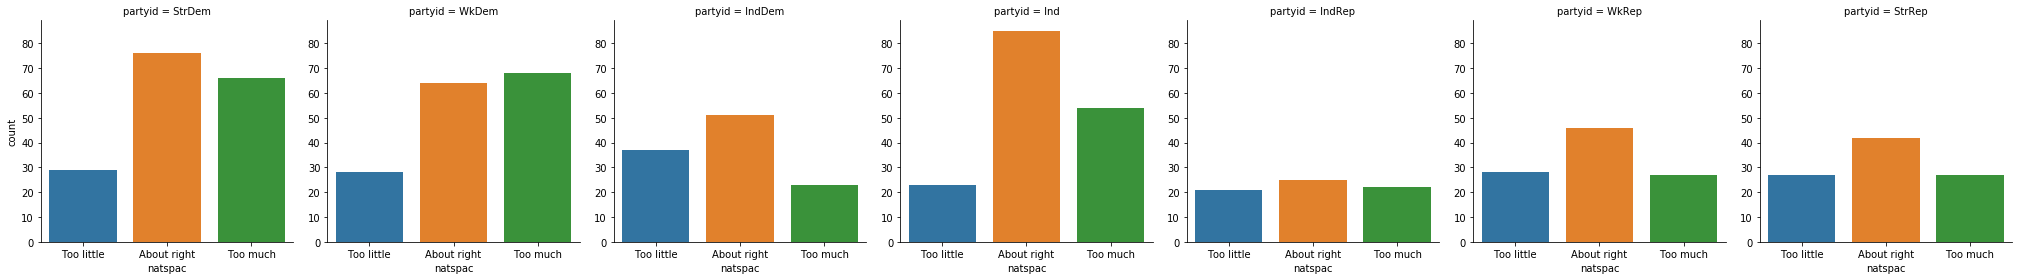

In [150]:
# View with factorplot.
sns.factorplot(x="natspac", col="partyid", kind="count", order=("Too little", "About right", "Too much"), col_order=("StrDem", "WkDem", "IndDem", "Ind", "IndRep", "WkRep",\
                                                      "StrRep"), data=df) 

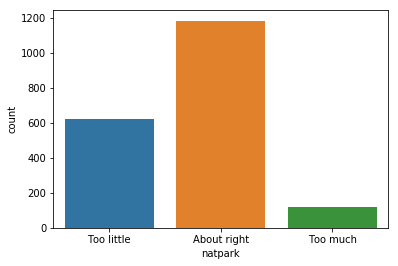

In [8]:
# How do people view the amount of money we are spending on national parks?
sns.countplot(x="natpark", order=("Too little", "About right", "Too much"), data=df) # people this we should be 
# spending more money on nat parks or we are spending the right amount.

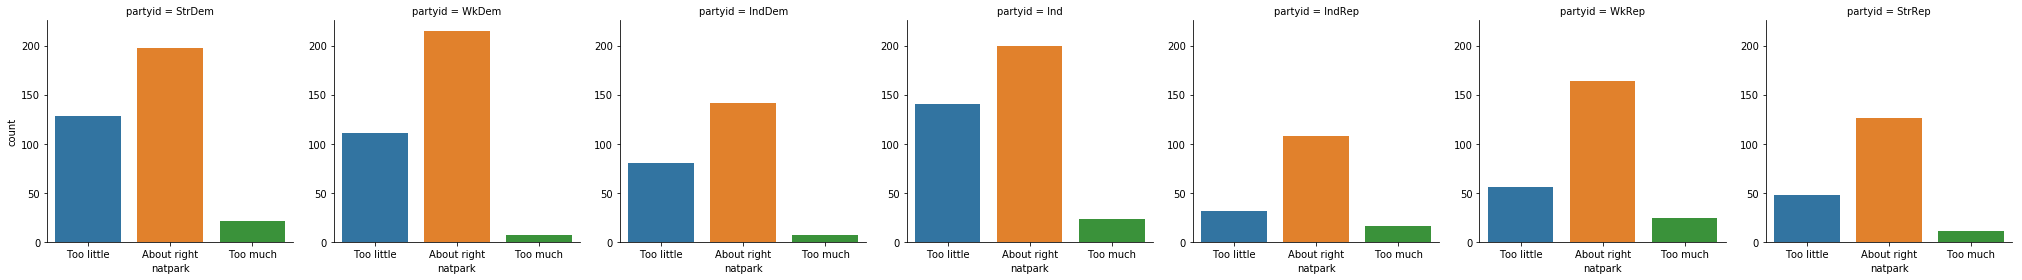

In [156]:
# How does this breakdown by party?
sns.factorplot(x="natpark", col="partyid", kind="count", order=("Too little", "About right", "Too much"), col_order=("StrDem", "WkDem", "IndDem", "Ind", "IndRep", "WkRep",\
                                                      "StrRep"), data=df)

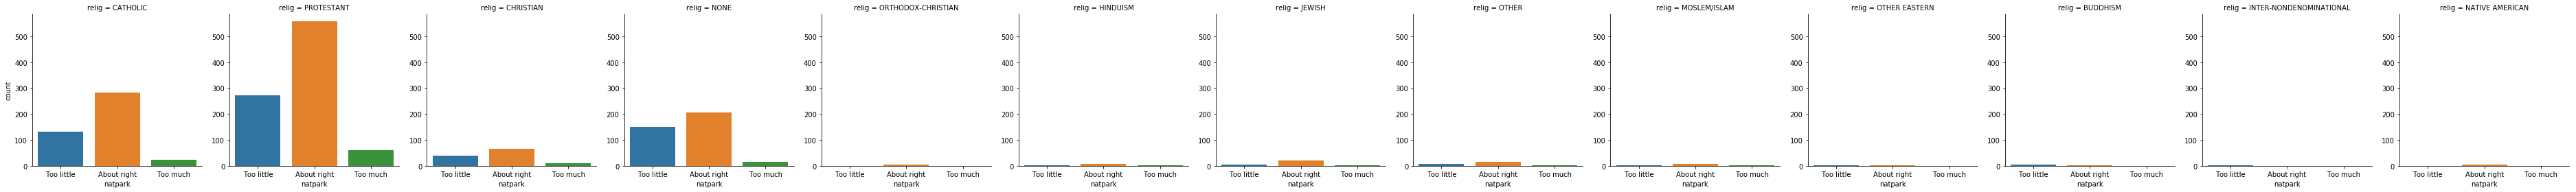

In [153]:
# By religion?
sns.factorplot(x="natpark", col="relig", kind="count", order=("Too little", "About right", "Too much"), data=df)

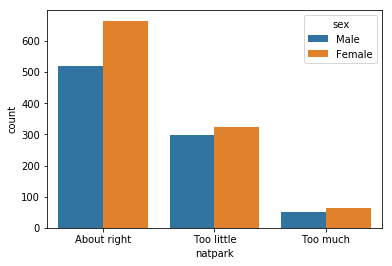

In [9]:
# How does this breakdown by sex?
sns.countplot(x="natpark", hue="sex", data=df)

In [ ]:
# This is weird, because it looks like many more females answered this question than men, 
# possibly because more females answered the survey than men, which we learned in our first
# part of the analysis. This skew effects our analysis.

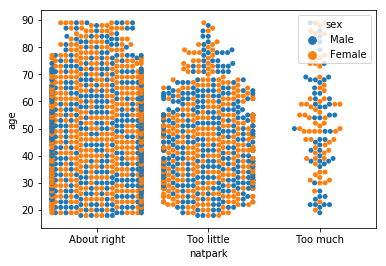

In [10]:
# How does this breakdown by age (and sex)?
sns.swarmplot(x="natpark", y="age", hue="sex", data=df) # too much looks skewed more to the center than the other two

## Beliefs about Anti-American Muslims

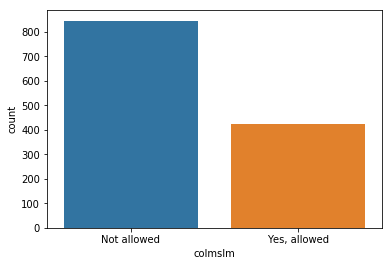

In [11]:
# How many people think we should ALLOW ANTI-AMERICAN MUSLIM CLERGYMEN TEACHING IN COLLEGE?
sns.countplot(x="colmslm", data=df)

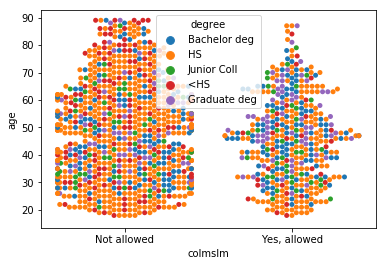

In [75]:
# I want to look at breakdown by degree attained and age to this question.
sns.swarmplot(x="colmslm", y="age", hue="degree", data=df) # Yes is skewed more to the center of the age 
# group than No.

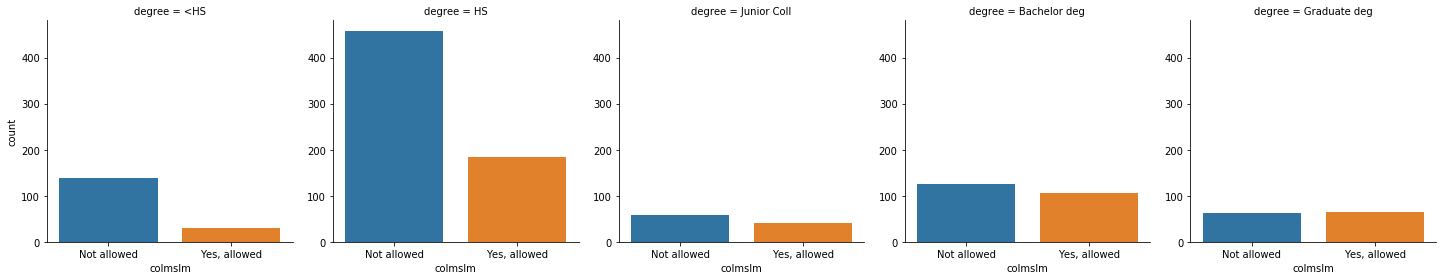

In [129]:
# Maybe we want to see this breakdown by degree using a factorplot.
sns.factorplot(x="colmslm", col="degree", col_order=("<HS", "HS", "Junior Coll", "Bachelor deg", \
                                                     "Graduate deg"), kind="count", data=df)
# We can see that as people get more educated, they appear generally more likely to allow this.

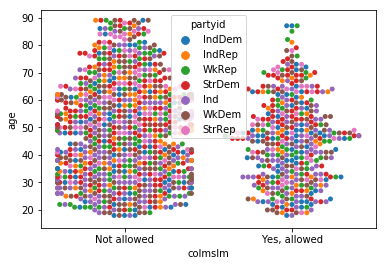

In [76]:
# Same breakdown by party id.
sns.swarmplot(x="colmslm", y="age", hue="partyid", data=df)

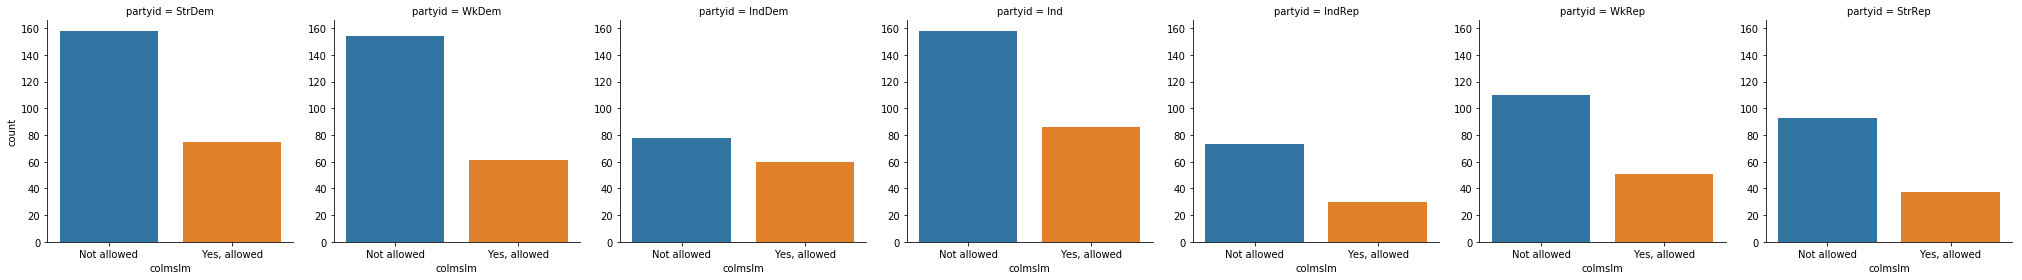

In [130]:
# Maybe we want to see this breakdown by party using a factorplot.
sns.factorplot(x="colmslm", col="partyid", col_order=("StrDem", "WkDem", "IndDem", "Ind", "IndRep", "WkRep",\
                                                      "StrRep"), kind="count", data=df)
# Ind Dems are the closest by far.

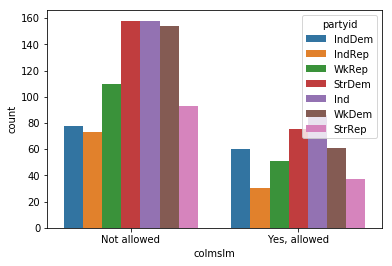

In [77]:
# Visualize these all on one bar chart.
sns.countplot(x="colmslm", hue="partyid", data=df)

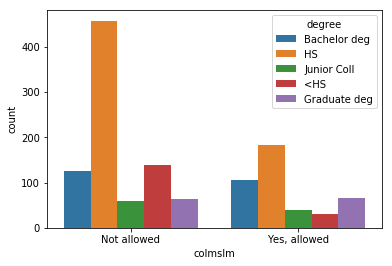

In [78]:
sns.countplot(x="colmslm", hue="degree", data=df)

## TV Hours

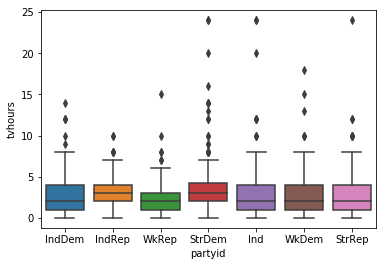

In [102]:
# How do TV hours vary among the political party?
sns.boxplot(x="partyid", y="tvhours", data=df) # Interesting that there are more outliers in the strdem.

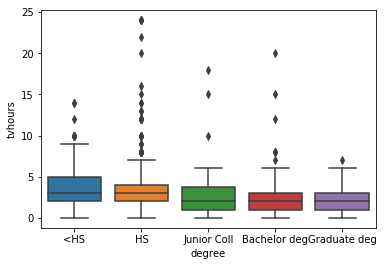

In [16]:
# How do tv hours vary among different educational attainment levels?
sns.boxplot(x="degree", y="tvhours", order=("<HS", "HS", "Junior Coll", "Bachelor deg", "Graduate deg"), \
            data=df)

## Race and Gender Belief Breakdowns

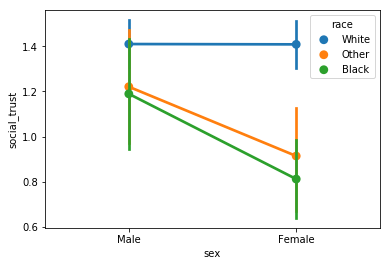

In [96]:
# Let's look at how different questions are asked differently among races and genders. First,
# how does mean social trust vary among this groups?
sns.pointplot(x="sex", y="social_trust", hue="race", data=df)

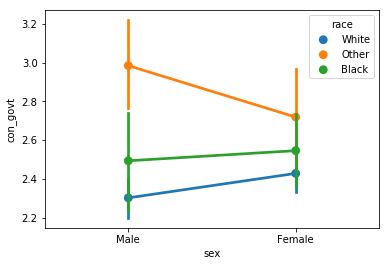

In [99]:
# How does mean confidence in goverment vary between these different races and genders?
sns.pointplot(x="sex", y="con_govt", hue="race", data=df)

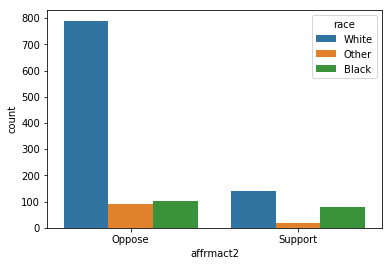

In [109]:
# Breakdown of peoples' support for affirmative action by race
sns.countplot(x="affrmact2", hue="race", data=df) 

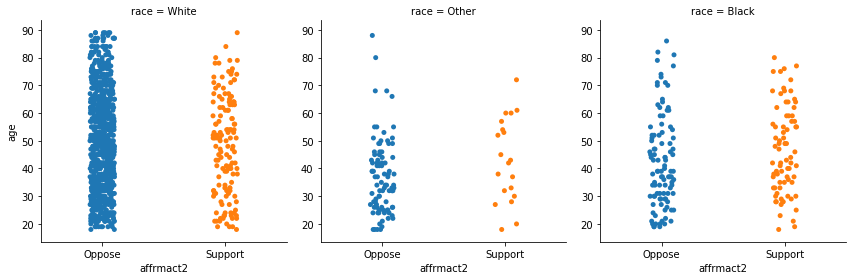

In [140]:
# This makes it look like more white people oppose affirmative action, but this is partially because more
# white people were interviewed. Interestingly, this graph also shows that the amount of African Americans 
# that oppose affirmative action is higher than the amount that support it. What if we compare this among ages
# for each race?
sns.factorplot(x = "affrmact2", y = "age", col="race", data = df, kind="strip", jitter=True)

## Ideas about life after death

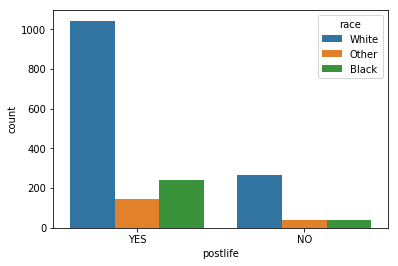

In [18]:
# What about views about life after death by race?
sns.countplot(x="postlife", hue="race", data=df)

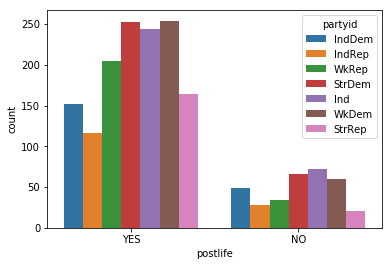

In [17]:
# By party?
sns.countplot(x="postlife", hue="partyid", data=df)

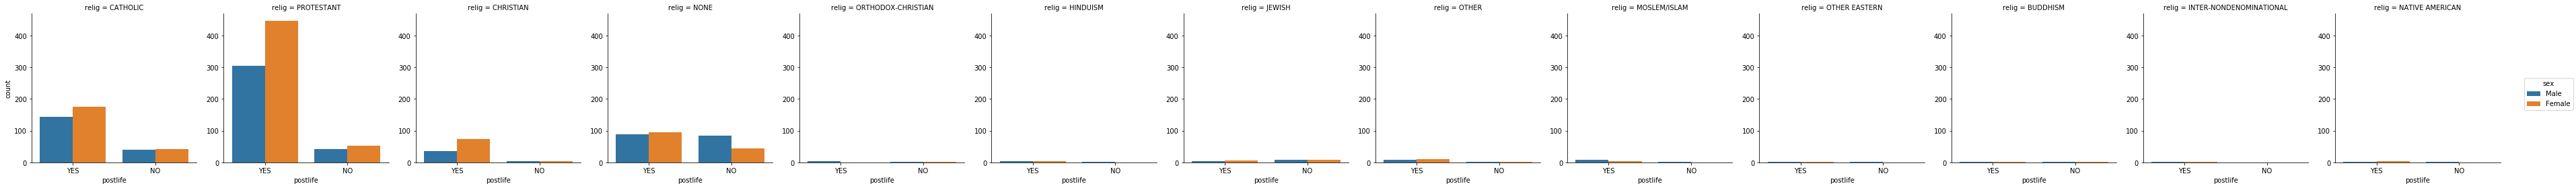

In [158]:
# Look at this breakdown of views on life after death by gender for each religious group.
sns.factorplot(x="postlife", hue="sex", col="relig", kind="count", data=df) # looks like slighty more Jewish
# individuals answered no, but difficult to see since we are missing data from many religious groups.
# This plot shows how little data we have on non-Catholics/non-Christians/non-religious people.

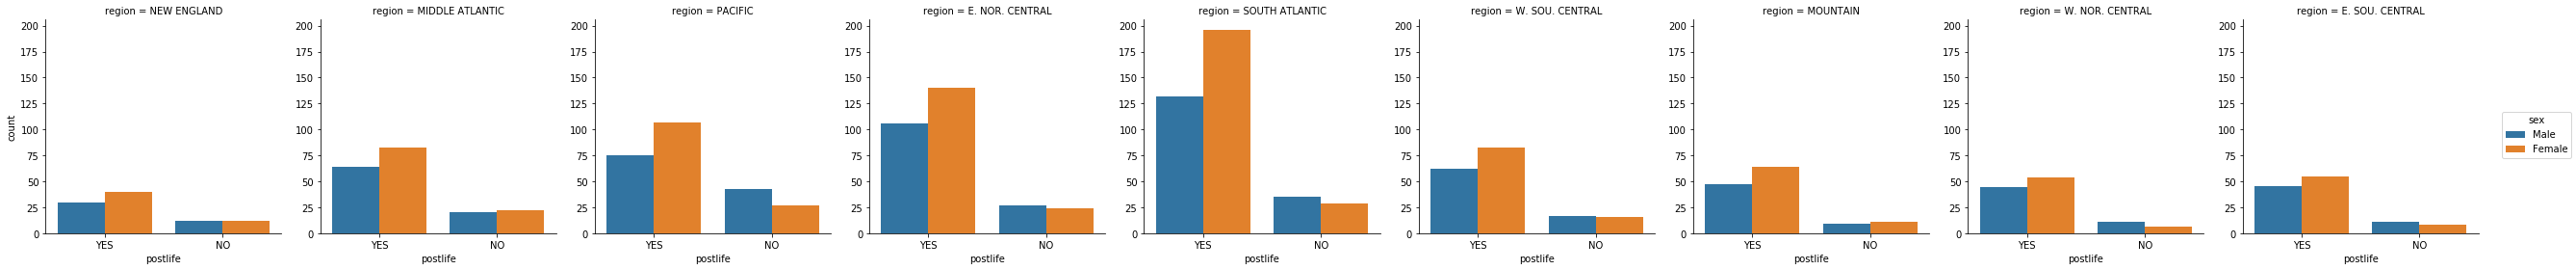

In [159]:
# Look at this breakdown by region.
sns.factorplot(x="postlife", hue="sex", col="region", kind="count", data=df)

## Ideas about gun laws

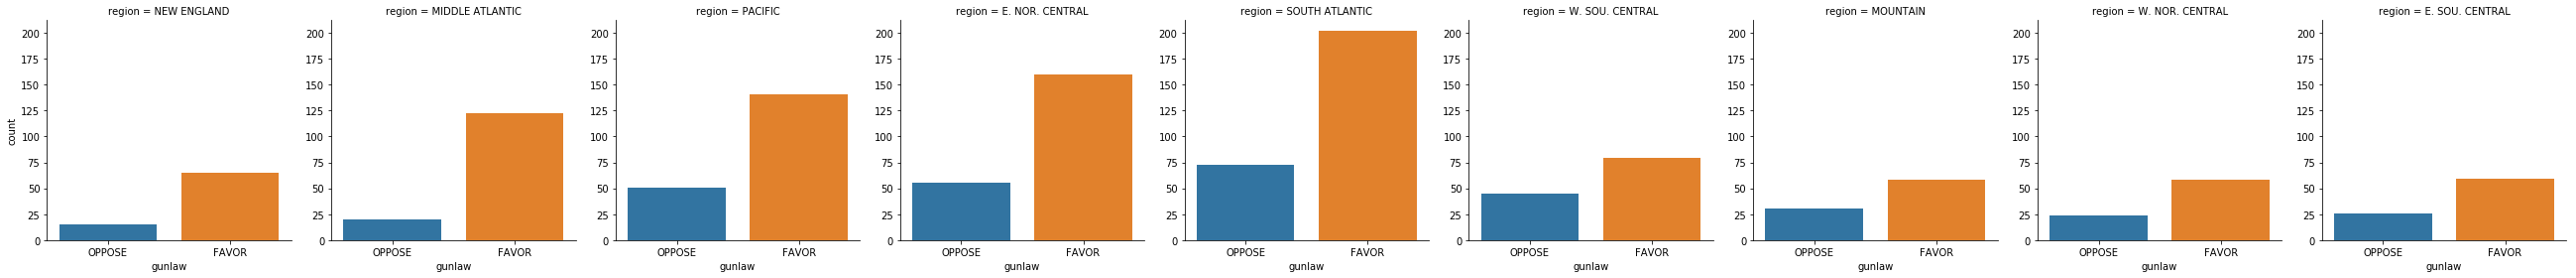

In [19]:
# How do views on gun laws differ by region?
sns.factorplot(x="gunlaw", col="region", kind="count", data=df)

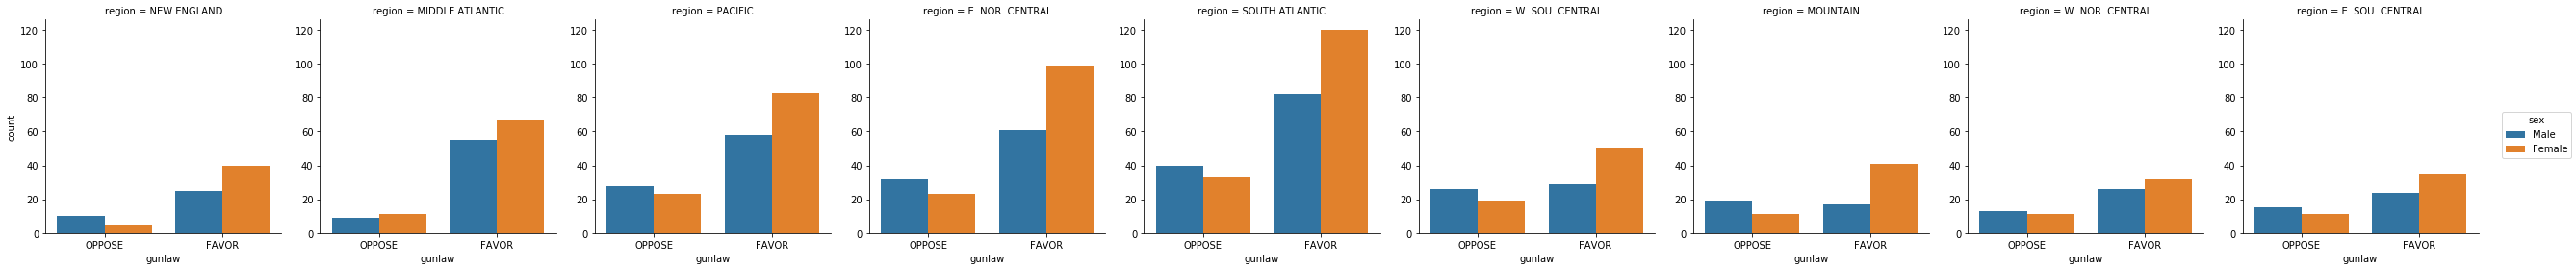

In [163]:
# Further breakdown by sex.
sns.factorplot(x="gunlaw", hue="sex", col="region", kind="count", data=df)

## Number of words right by region

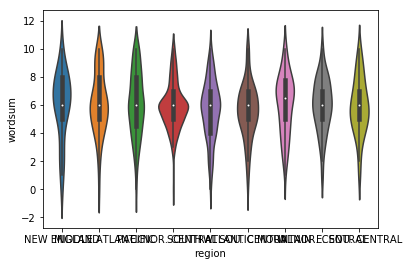

In [165]:
# Does region effect number of words correct on vocab test?
sns.violinplot(x="region", y="wordsum", data=df) # means look fairly similar

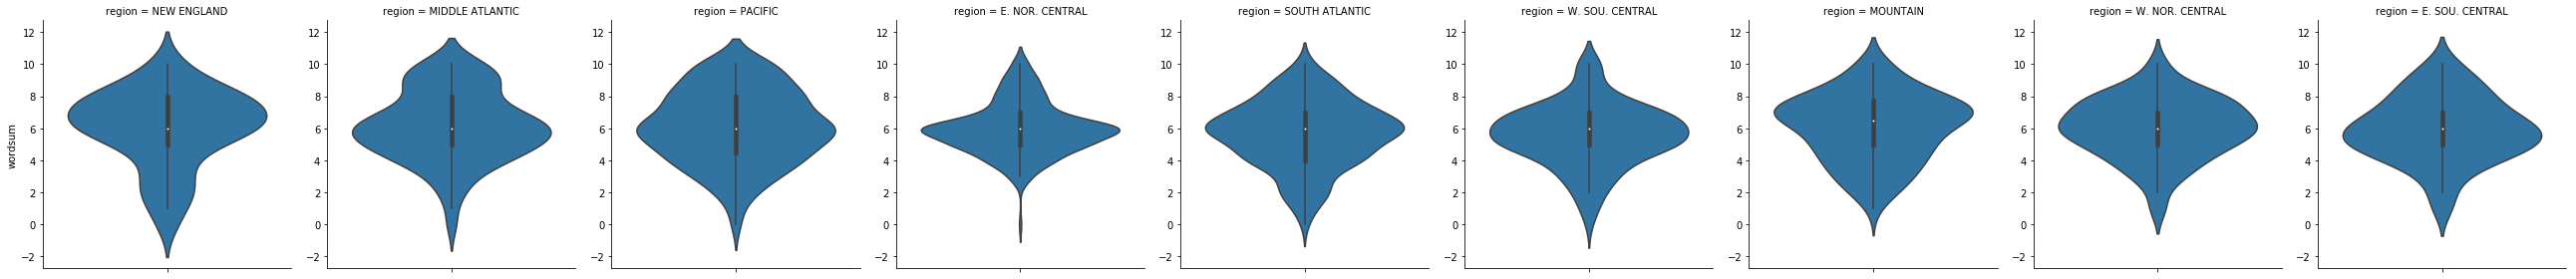

In [166]:
# Hard to see, so break into factorplot.
sns.factorplot(y="wordsum", col="region", kind="violin", data=df)